In [1]:
import pandas as pd  # <--- You need this import
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
# This is the missing step. You must load your CSV into a DataFrame.
# We'll use the mock data example:
data = pd.read_csv("/Users/utkarshtyagi/Downloads/Q2_data_did.csv")

In [4]:
model=smf.ols('hours_worked ~ treated * post + age + female + sector',data=data).fit(cov_type='HC1')

In [5]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           hours_worked   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     50.55
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           3.31e-50
Time:                        18:31:24   Log-Likelihood:                -1275.1
No. Observations:                 600   AIC:                             2564.
Df Residuals:                     593   BIC:                             2595.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           40.4576      0.323  

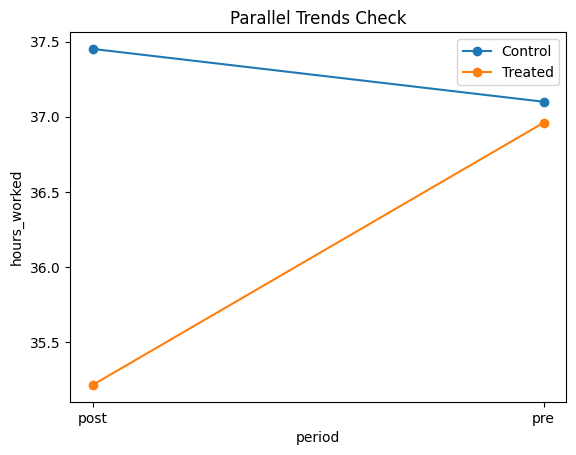

In [7]:
# Parallel trends plot
avg_trends = data.groupby(['period', 'treated'])['hours_worked'].mean().reset_index()
plt.plot(avg_trends[avg_trends['treated']==0]['period'], avg_trends[avg_trends['treated']==0]['hours_worked'], marker='o', label='Control')
plt.plot(avg_trends[avg_trends['treated']==1]['period'], avg_trends[avg_trends['treated']==1]['hours_worked'], marker='o', label='Treated')
plt.legend()
plt.xlabel("period")
plt.ylabel("hours_worked")
plt.title("Parallel Trends Check")
plt.show()

In [11]:
# --- 5. ROBUSTNESS CHECK (Add controls) ---
controls = [' age ', ' female ', ' sector']    # replace with your controls
robust_formula = f" hours_worked ~ treated* post + {' + '.join(controls)}"
did_robust = smf.ols(robust_formula, data=data).fit(cov_type='HC1')
print("\n================ ROBUSTNESS (DiD + CONTROLS) ================")
print(did_robust.summary())




================ ROBUSTNESS (DiD + CONTROLS) ================
                            OLS Regression Results                            
Dep. Variable:           hours_worked   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     50.55
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           3.31e-50
Time:                        18:37:20   Log-Likelihood:                -1275.1
No. Observations:                 600   AIC:                             2564.
Df Residuals:                     593   BIC:                             2595.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------